In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torchinfo import summary
import torch.optim as optim
from torch.utils.data import DataLoader,Dataset
import torch.utils.data as data
from torchvision import transforms
import torchvision

import sys,os
sys.path.append(os.pardir)

import py_func.Deep_learning_torch_func as DL
import py_func.models_func as my_model
import py_func.dat_rb_func as drb
import py_func.my_numpy_class as mnc
import py_func.my_torch_class as mtc
import py_func.models_func as my_model

import py_func.Deep_learning_torch_func as DL
import py_func.dat_rb_func as drb

from torchinfo import summary

from torch.optim import lr_scheduler
import numpy as np
import importlib
import os.path as osp


import matplotlib.pyplot as plt

In [6]:
importlib.reload(mtc)

<module 'py_func.my_torch_class' from '../py_func/my_torch_class.py'>

### FashionMNIST simulation dataset 68000train not shuffle

In [2]:
outputdir = "../output/sim/SLM_phase/fm"
howdatadir = osp.join(outputdir, "id/68000train/")

datapath = '../dat/simdat/SLM_phase/1byte/lsd/fm_4cm_4cm_3.3mm_notpad_4096x2400_samevalue_sclup_to8192x4800_sim.dat'
labelpath='../dat/label/fm_label.dat'

In [3]:
fm=mnc.My_numpy(1, datapath)
fm.simread(70000, 4096)
fm.data=fm.data.reshape(70000, 1, 4096)
print(fm.data.shape)

(70000, 1, 4096)


In [4]:
data=fm.data[:,:,int(4096/2)-int(1600/2):int(4096/2)+int(1600/2)]
print(data.shape)

(70000, 1, 1600)


In [5]:
fmlbl=mnc.My_numpy(4, labelpath)
fmlbl.labelread(70000)
print(fmlbl.data.shape)

(70000,)


In [10]:
myset=mtc.My_dataset2(data, fmlbl.data)
myset.numpy2tensor_labelint()
trainset, valset, testset=myset.splitdata(68000, 1000, 1000)
myset.set3data(trainset[0], valset[0], testset[0])
myset.set3label(trainset[1], valset[1], testset[1])

myset.datanormalize()
myset.tensor2dataset()
batch=256
flt=DataLoader(myset.dataset_train, batch_size=batch, shuffle=True)
flv=DataLoader(myset.dataset_val, batch_size=batch, shuffle=False)
fltest=DataLoader(myset.dataset_test, batch_size=batch, shuffle=False)

print(len(flt), len(flv), len(fltest))

266 4 4


In [15]:
channel = [1, 16]
kernel_size = [128]
pool_list = [2]
criterion = nn.NLLLoss()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

model = my_model.cnn1d(channel, kernel_size, pool_list, 10, 0.5, 128).to(device)

In [12]:
device

device(type='cuda', index=0)

In [13]:
lrdir=osp.join(howdatadir, "lr1e-05")

----------------------------epoch1------------------------------
val_acc0.6390 ,train_acc0.6288
epochtime:0.0929 minutes
----------------------------epoch2------------------------------
val_acc0.6840 ,train_acc0.6807
epochtime:0.0366 minutes
----------------------------epoch3------------------------------
val_acc0.7110 ,train_acc0.7098
epochtime:0.0372 minutes
----------------------------epoch4------------------------------
val_acc0.7330 ,train_acc0.7255
epochtime:0.0374 minutes
----------------------------epoch5------------------------------
val_acc0.7470 ,train_acc0.7394
epochtime:0.0365 minutes
----------------------------epoch6------------------------------
val_acc0.7540 ,train_acc0.7478
epochtime:0.0366 minutes
----------------------------epoch7------------------------------
val_acc0.7620 ,train_acc0.7558
epochtime:0.0372 minutes
----------------------------epoch8------------------------------
val_acc0.7690 ,train_acc0.7622
epochtime:0.0357 minutes
----------------------------epoc

----------------------------epoch69------------------------------
val_acc0.8230 ,train_acc0.8495
epochtime:0.0367 minutes
----------------------------epoch70------------------------------
val_acc0.8200 ,train_acc0.8496
epochtime:0.0355 minutes
----------------------------epoch71------------------------------
val_acc0.8250 ,train_acc0.8500
epochtime:0.0360 minutes
----------------------------epoch72------------------------------
val_acc0.8240 ,train_acc0.8510
epochtime:0.0354 minutes
----------------------------epoch73------------------------------
val_acc0.8260 ,train_acc0.8523
epochtime:0.0365 minutes
----------------------------epoch74------------------------------
val_acc0.8220 ,train_acc0.8534
epochtime:0.0359 minutes
----------------------------epoch75------------------------------
val_acc0.8280 ,train_acc0.8540
epochtime:0.0388 minutes
----------------------------epoch76------------------------------
val_acc0.8320 ,train_acc0.8546
epochtime:0.0420 minutes
------------------------

----------------------------epoch136------------------------------
val_acc0.8250 ,train_acc0.8836
epochtime:0.0359 minutes
----------------------------epoch137------------------------------
val_acc0.8260 ,train_acc0.8834
epochtime:0.0353 minutes
----------------------------epoch138------------------------------
val_acc0.8290 ,train_acc0.8844
epochtime:0.0361 minutes
----------------------------epoch139------------------------------
val_acc0.8290 ,train_acc0.8849
epochtime:0.0360 minutes
----------------------------epoch140------------------------------
val_acc0.8250 ,train_acc0.8837
epochtime:0.0353 minutes
----------------------------epoch141------------------------------
val_acc0.8270 ,train_acc0.8861
epochtime:0.0361 minutes
----------------------------epoch142------------------------------
val_acc0.8230 ,train_acc0.8851
epochtime:0.0359 minutes
----------------------------epoch143------------------------------
val_acc0.8250 ,train_acc0.8862
epochtime:0.0354 minutes
----------------

----------------------------epoch203------------------------------
val_acc0.8350 ,train_acc0.9088
epochtime:0.0364 minutes
----------------------------epoch204------------------------------
val_acc0.8330 ,train_acc0.9098
epochtime:0.0356 minutes
----------------------------epoch205------------------------------
val_acc0.8360 ,train_acc0.9096
epochtime:0.0364 minutes
----------------------------epoch206------------------------------
val_acc0.8340 ,train_acc0.9107
epochtime:0.0362 minutes
----------------------------epoch207------------------------------
val_acc0.8380 ,train_acc0.9115
epochtime:0.0353 minutes
----------------------------epoch208------------------------------
val_acc0.8350 ,train_acc0.9102
epochtime:0.0360 minutes
----------------------------epoch209------------------------------
val_acc0.8350 ,train_acc0.9111
epochtime:0.0362 minutes
----------------------------epoch210------------------------------
val_acc0.8380 ,train_acc0.9109
epochtime:0.0354 minutes
----------------

----------------------------epoch270------------------------------
val_acc0.8380 ,train_acc0.9287
epochtime:0.0361 minutes
----------------------------epoch271------------------------------
val_acc0.8370 ,train_acc0.9299
epochtime:0.0361 minutes
----------------------------epoch272------------------------------
val_acc0.8400 ,train_acc0.9298
epochtime:0.0353 minutes
----------------------------epoch273------------------------------
val_acc0.8450 ,train_acc0.9312
epochtime:0.0360 minutes
----------------------------epoch274------------------------------
val_acc0.8390 ,train_acc0.9298
epochtime:0.0360 minutes
----------------------------epoch275------------------------------
val_acc0.8390 ,train_acc0.9301
epochtime:0.0354 minutes
----------------------------epoch276------------------------------
val_acc0.8450 ,train_acc0.9314
epochtime:0.0360 minutes
----------------------------epoch277------------------------------
val_acc0.8440 ,train_acc0.9316
epochtime:0.0354 minutes
----------------

----------------------------epoch337------------------------------
val_acc0.8400 ,train_acc0.9468
epochtime:0.0373 minutes
----------------------------epoch338------------------------------
val_acc0.8390 ,train_acc0.9468
epochtime:0.0371 minutes
----------------------------epoch339------------------------------
val_acc0.8430 ,train_acc0.9476
epochtime:0.0355 minutes
----------------------------epoch340------------------------------
val_acc0.8400 ,train_acc0.9479
epochtime:0.0365 minutes
----------------------------epoch341------------------------------
val_acc0.8370 ,train_acc0.9475
epochtime:0.0359 minutes
----------------------------epoch342------------------------------
val_acc0.8410 ,train_acc0.9483
epochtime:0.0353 minutes
----------------------------epoch343------------------------------
val_acc0.8430 ,train_acc0.9482
epochtime:0.0359 minutes
----------------------------epoch344------------------------------
val_acc0.8370 ,train_acc0.9488
epochtime:0.0359 minutes
----------------

----------------------------epoch404------------------------------
val_acc0.8430 ,train_acc0.9597
epochtime:0.0358 minutes
----------------------------epoch405------------------------------
val_acc0.8440 ,train_acc0.9603
epochtime:0.0361 minutes
----------------------------epoch406------------------------------
val_acc0.8410 ,train_acc0.9591
epochtime:0.0361 minutes
----------------------------epoch407------------------------------
val_acc0.8450 ,train_acc0.9617
epochtime:0.0352 minutes
----------------------------epoch408------------------------------
val_acc0.8430 ,train_acc0.9605
epochtime:0.0358 minutes
----------------------------epoch409------------------------------
val_acc0.8490 ,train_acc0.9611
epochtime:0.0359 minutes
----------------------------epoch410------------------------------
val_acc0.8430 ,train_acc0.9611
epochtime:0.0353 minutes
----------------------------epoch411------------------------------
val_acc0.8410 ,train_acc0.9605
epochtime:0.0359 minutes
----------------

----------------------------epoch471------------------------------
val_acc0.8430 ,train_acc0.9701
epochtime:0.0355 minutes
----------------------------epoch472------------------------------
val_acc0.8420 ,train_acc0.9710
epochtime:0.0376 minutes
----------------------------epoch473------------------------------
val_acc0.8410 ,train_acc0.9700
epochtime:0.0407 minutes
----------------------------epoch474------------------------------
val_acc0.8400 ,train_acc0.9711
epochtime:0.0400 minutes
----------------------------epoch475------------------------------
val_acc0.8410 ,train_acc0.9695
epochtime:0.0389 minutes
----------------------------epoch476------------------------------
val_acc0.8400 ,train_acc0.9715
epochtime:0.0374 minutes
----------------------------epoch477------------------------------
val_acc0.8430 ,train_acc0.9704
epochtime:0.0402 minutes
----------------------------epoch478------------------------------
val_acc0.8400 ,train_acc0.9704
epochtime:0.0404 minutes
----------------

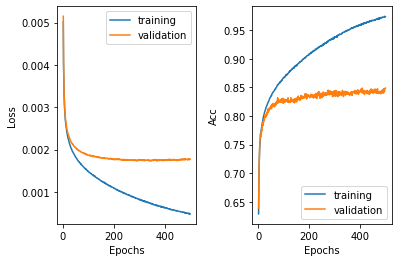

[0.84, 0.0018175404071807861]


In [14]:
optimizer = optim.Adam(model.parameters(), lr=1e-05)

epochs = 500

# modelsavedir = osp.join(lrdir, "16ch128ks")
# md_path = osp.join(modelsavedir, 'm30000_1600_expe_e1000.pth')

#training
tl, vl, ta, va = DL.train_model_ver3(flt, flv, model, criterion, optimizer, epochs, device)

#torch.save(model.state_dict(), md_path)
DL.learning_curv_ver2( 12, 4, 10, 10, tls = tl, vls = vl, tas = ta, vas = va)


val = DL.val_model(fltest, model, device, criterion, False)
print(val)

----------------------------epoch1------------------------------
val_acc0.5680 ,train_acc0.5473
epochtime:0.0420 minutes
----------------------------epoch2------------------------------
val_acc0.6290 ,train_acc0.6251
epochtime:0.0423 minutes
----------------------------epoch3------------------------------
val_acc0.6650 ,train_acc0.6573
epochtime:0.0414 minutes
----------------------------epoch4------------------------------
val_acc0.6820 ,train_acc0.6798
epochtime:0.0422 minutes
----------------------------epoch5------------------------------
val_acc0.6950 ,train_acc0.6974
epochtime:0.0418 minutes
----------------------------epoch6------------------------------
val_acc0.7100 ,train_acc0.7091
epochtime:0.0425 minutes
----------------------------epoch7------------------------------
val_acc0.7230 ,train_acc0.7184
epochtime:0.0424 minutes
----------------------------epoch8------------------------------
val_acc0.7310 ,train_acc0.7276
epochtime:0.0416 minutes
----------------------------epoc

----------------------------epoch69------------------------------
val_acc0.8060 ,train_acc0.8215
epochtime:0.0427 minutes
----------------------------epoch70------------------------------
val_acc0.8020 ,train_acc0.8216
epochtime:0.0424 minutes
----------------------------epoch71------------------------------
val_acc0.8070 ,train_acc0.8230
epochtime:0.0415 minutes
----------------------------epoch72------------------------------
val_acc0.8060 ,train_acc0.8232
epochtime:0.0403 minutes
----------------------------epoch73------------------------------
val_acc0.8060 ,train_acc0.8229
epochtime:0.0409 minutes
----------------------------epoch74------------------------------
val_acc0.8090 ,train_acc0.8233
epochtime:0.0406 minutes
----------------------------epoch75------------------------------
val_acc0.8130 ,train_acc0.8247
epochtime:0.0409 minutes
----------------------------epoch76------------------------------
val_acc0.8060 ,train_acc0.8250
epochtime:0.0408 minutes
------------------------

----------------------------epoch136------------------------------
val_acc0.8210 ,train_acc0.8492
epochtime:0.0367 minutes
----------------------------epoch137------------------------------
val_acc0.8220 ,train_acc0.8497
epochtime:0.0357 minutes
----------------------------epoch138------------------------------
val_acc0.8210 ,train_acc0.8503
epochtime:0.0364 minutes
----------------------------epoch139------------------------------
val_acc0.8170 ,train_acc0.8502
epochtime:0.0367 minutes
----------------------------epoch140------------------------------
val_acc0.8180 ,train_acc0.8508
epochtime:0.0365 minutes
----------------------------epoch141------------------------------
val_acc0.8220 ,train_acc0.8516
epochtime:0.0368 minutes
----------------------------epoch142------------------------------
val_acc0.8200 ,train_acc0.8509
epochtime:0.0364 minutes
----------------------------epoch143------------------------------
val_acc0.8200 ,train_acc0.8513
epochtime:0.0368 minutes
----------------

----------------------------epoch203------------------------------
val_acc0.8250 ,train_acc0.8691
epochtime:0.0352 minutes
----------------------------epoch204------------------------------
val_acc0.8280 ,train_acc0.8699
epochtime:0.0357 minutes
----------------------------epoch205------------------------------
val_acc0.8200 ,train_acc0.8700
epochtime:0.0352 minutes
----------------------------epoch206------------------------------
val_acc0.8210 ,train_acc0.8697
epochtime:0.0358 minutes
----------------------------epoch207------------------------------
val_acc0.8220 ,train_acc0.8703
epochtime:0.0358 minutes
----------------------------epoch208------------------------------
val_acc0.8230 ,train_acc0.8710
epochtime:0.0352 minutes
----------------------------epoch209------------------------------
val_acc0.8250 ,train_acc0.8709
epochtime:0.0358 minutes
----------------------------epoch210------------------------------
val_acc0.8220 ,train_acc0.8710
epochtime:0.0359 minutes
----------------

----------------------------epoch270------------------------------
val_acc0.8340 ,train_acc0.8846
epochtime:0.0359 minutes
----------------------------epoch271------------------------------
val_acc0.8310 ,train_acc0.8857
epochtime:0.0353 minutes
----------------------------epoch272------------------------------
val_acc0.8340 ,train_acc0.8855
epochtime:0.0358 minutes
----------------------------epoch273------------------------------
val_acc0.8300 ,train_acc0.8859
epochtime:0.0358 minutes
----------------------------epoch274------------------------------
val_acc0.8290 ,train_acc0.8861
epochtime:0.0353 minutes
----------------------------epoch275------------------------------
val_acc0.8290 ,train_acc0.8865
epochtime:0.0359 minutes
----------------------------epoch276------------------------------
val_acc0.8320 ,train_acc0.8863
epochtime:0.0359 minutes
----------------------------epoch277------------------------------
val_acc0.8320 ,train_acc0.8862
epochtime:0.0352 minutes
----------------

----------------------------epoch337------------------------------
val_acc0.8390 ,train_acc0.8982
epochtime:0.0355 minutes
----------------------------epoch338------------------------------
val_acc0.8440 ,train_acc0.8988
epochtime:0.0361 minutes
----------------------------epoch339------------------------------
val_acc0.8420 ,train_acc0.8984
epochtime:0.0363 minutes
----------------------------epoch340------------------------------
val_acc0.8370 ,train_acc0.8992
epochtime:0.0356 minutes
----------------------------epoch341------------------------------
val_acc0.8440 ,train_acc0.8985
epochtime:0.0364 minutes
----------------------------epoch342------------------------------
val_acc0.8360 ,train_acc0.8993
epochtime:0.0354 minutes
----------------------------epoch343------------------------------
val_acc0.8410 ,train_acc0.8998
epochtime:0.0363 minutes
----------------------------epoch344------------------------------
val_acc0.8440 ,train_acc0.9001
epochtime:0.0367 minutes
----------------

----------------------------epoch404------------------------------
val_acc0.8390 ,train_acc0.9107
epochtime:0.0358 minutes
----------------------------epoch405------------------------------
val_acc0.8440 ,train_acc0.9110
epochtime:0.0352 minutes
----------------------------epoch406------------------------------
val_acc0.8400 ,train_acc0.9098
epochtime:0.0363 minutes
----------------------------epoch407------------------------------
val_acc0.8400 ,train_acc0.9110
epochtime:0.0358 minutes
----------------------------epoch408------------------------------
val_acc0.8400 ,train_acc0.9111
epochtime:0.0352 minutes
----------------------------epoch409------------------------------
val_acc0.8420 ,train_acc0.9110
epochtime:0.0359 minutes
----------------------------epoch410------------------------------
val_acc0.8410 ,train_acc0.9108
epochtime:0.0360 minutes
----------------------------epoch411------------------------------
val_acc0.8420 ,train_acc0.9123
epochtime:0.0356 minutes
----------------

----------------------------epoch471------------------------------
val_acc0.8420 ,train_acc0.9208
epochtime:0.0356 minutes
----------------------------epoch472------------------------------
val_acc0.8460 ,train_acc0.9219
epochtime:0.0361 minutes
----------------------------epoch473------------------------------
val_acc0.8460 ,train_acc0.9224
epochtime:0.0359 minutes
----------------------------epoch474------------------------------
val_acc0.8440 ,train_acc0.9223
epochtime:0.0354 minutes
----------------------------epoch475------------------------------
val_acc0.8430 ,train_acc0.9225
epochtime:0.0361 minutes
----------------------------epoch476------------------------------
val_acc0.8420 ,train_acc0.9224
epochtime:0.0361 minutes
----------------------------epoch477------------------------------
val_acc0.8430 ,train_acc0.9226
epochtime:0.0363 minutes
----------------------------epoch478------------------------------
val_acc0.8420 ,train_acc0.9225
epochtime:0.0364 minutes
----------------

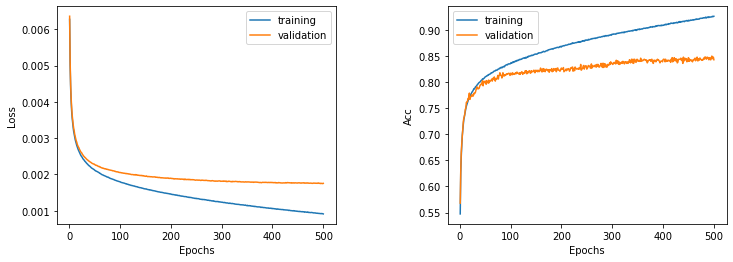

[0.831, 0.0017991326451301576]


In [16]:
optimizer = optim.Adam(model.parameters(), lr=5e-06)

epochs = 500

# modelsavedir = osp.join(lrdir, "16ch128ks")
# md_path = osp.join(modelsavedir, 'm30000_1600_expe_e1000.pth')

#training
tl, vl, ta, va = DL.train_model_ver3(flt, flv, model, criterion, optimizer, epochs, device)

#torch.save(model.state_dict(), md_path)
DL.learning_curv_ver2( 12, 4, 10, 10, tls = tl, vls = vl, tas = ta, vas = va)


val = DL.val_model(fltest, model, device, criterion, False)
print(val)

### experiment dataset

In [2]:
outputdir = "../output/experiment/SLM_phase/mnist"
howdatadir = osp.join(outputdir, "id/midline_randomshuffle_68000train/")

datapath = '../dat/experiment/SLM/m_now/m_1_70000_slt0.6_N3_lsd_midline.dat'
labelpath='../dat/label/mnist_label.dat'

shflidpath=osp.join(outputdir, "shuffle_first_68000.npy")
trainid = np.load(file=shflidpath)
shflidpath=osp.join(outputdir, "shuffle_68001_69000.npy")
valid = np.load(file=shflidpath)
shflidpath=osp.join(outputdir, "shuffle_69001_70000.npy")
testid = np.load(file=shflidpath)

In [3]:
mnist = mnc.My_numpy(1, datapath)
mnist.simread(70000, 1600)
print(mnist.data.shape)

mnist.data = mnist.data.reshape(70000, 1, 1600)
print(mnist.data.shape)

mlbl = mnc.My_numpy(4, labelpath)
mlbl.labelread(70000)
print(mlbl.data.shape)


myset = mtc.My_dataset2(mnist.data, mlbl.data)
myset.numpy2tensor_labelint()
traindata, trainlabel = myset.index_splitdata(trainid)
valdata, vallabel = myset.index_splitdata(valid)
testdata, testlabel = myset.index_splitdata(testid)

myset.set3data(traindata, val=valdata, test=testdata)
myset.set3label(trainlabel, val=vallabel, test=testlabel)

myset.datanormalize()
myset.tensor2dataset()

batch=256
mlt = DataLoader(myset.dataset_train, batch_size = batch, shuffle = True)
mlv = DataLoader(myset.dataset_val, batch_size = batch, shuffle = False)
mltest = DataLoader(myset.dataset_test, batch_size = batch, shuffle = False)

print(len(mlt), len(mlv), len(mltest))

(70000, 1600)
(70000, 1, 1600)
(70000,)
266 4 4


In [4]:
channel = [1, 16]
kernel_size = [128]
pool_list = [2]
criterion = nn.NLLLoss()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

model = my_model.cnn1d(channel, kernel_size, pool_list, 10, 0.5, 128).to(device)

/home/kawamoto/anaconda3/envs/mytorch37/lib/python3.7/site-packages/torch/nn/modules/lazy.py:178: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


エポック1------------------------------
val_acc0.5140 ,train_acc0.5090
epochtime:0.1288分
エポック2------------------------------
val_acc0.5990 ,train_acc0.6139
epochtime:0.0388分
エポック3------------------------------
val_acc0.6640 ,train_acc0.6732
epochtime:0.0451分
エポック4------------------------------
val_acc0.6850 ,train_acc0.7071
epochtime:0.0444分
指定した損失値を,decision_num番目以降の平均が下回ったので,エポック4で終了しました．



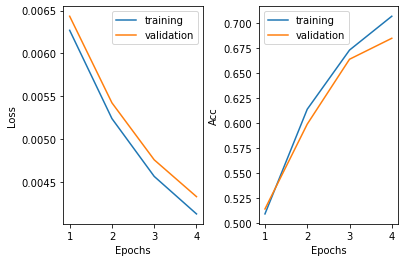

In [5]:
optimizer = optim.Adam(model.parameters(), lr=1e-04)

epochs = 1000

# modelsavedir = osp.join(lrdir, "16ch128ks")
# md_path = osp.join(modelsavedir, 'm30000_1600_expe_e1000.pth')

#training
tl, vl, ta, va = DL.train_model_mixup(mlt, mlv, model, criterion, optimizer, epochs, device, 
                                    mean_or_improve="mean", decision_num=3, decision_mean=0.005, 
                                    mixalpha=0.5)

#torch.save(model.state_dict(), md_path)
DL.learning_curv_ver2( 12, 4, 10, 10, tls = tl, vls = vl, tas = ta, vas = va)


# val = DL.val_model(mltest, model, device, criterion, False)
# print(val)

In [6]:
device

device(type='cuda', index=0)